In [22]:
import imageio.v2 as imageio
import ipyplot

In [23]:
a = 256
b = 256
c = 256

skin_array = [[ [0 for col in range(a)] for col in range(b)] for row in range(c)]

In [24]:
nonskin_array = [[ [0 for col in range(a)] for col in range(b)] for row in range(c)]

In [25]:
import os


In [26]:
basepath = "ibtd"
for filename in os.listdir(basepath):
    if filename=="0100.jpg":
      break
    if filename.endswith(".jpg"): 
        unmask_img_name=os.path.join(basepath, filename)
        unmask_img = imageio.imread(unmask_img_name)
        height, width, channels = unmask_img.shape
        for x in range(height):
          for y in range(width):
            b = unmask_img[x][y][0] 
            g = unmask_img[x][y][1]
            r = unmask_img[x][y][2]
            nonskin_array[r][g][b] = skin_array[r][g][b] + 1

In [14]:
basepath = "ibtd/Mask"
for filename in os.listdir(basepath):
    if filename=="0100.jpg":
      break
    if filename.endswith(".bmp"): 
        mask_img_name=os.path.join(basepath, filename)
        mask_img = imageio.imread(unmask_img_name)
        height, width, channels = mask_img.shape
        for x in range(height):
          for y in range(width):
            b = mask_img[x][y][0] 
            g = mask_img[x][y][1]
            r = mask_img[x][y][2]
            skin_array[r][g][b] = skin_array[r][g][b] + 1

In [15]:
sum_skin=0
sum_nonskin=0

for x in range(256):
  for y in range(256):
    sum_skin=sum_skin+sum(skin_array[x][y])
    sum_nonskin=sum_nonskin+sum(nonskin_array[x][y])

In [16]:
a = 256
b = 256
c = 256
p_array = [[ [0 for col in range(a)] for col in range(b)] for row in range(c)]
print
for x in range(256):
  for y in range(256):
    for z in range(256):
      skin_array[x][y][z] = skin_array[x][y][z] / sum_skin
      nonskin_array[x][y][z] = nonskin_array[x][y][z] / sum_nonskin
      if nonskin_array[x][y][z] != 0:
        p_array[x][y][z] = skin_array[x][y][z] / nonskin_array[x][y][z] 
      else:
        p_array[x][y][z]=0

In [17]:
test_img = imageio.imread('ibtd/0294.jpg')
T = 0.4
height, width, channels = test_img.shape
for x in range(height):
  for y in range(width):
    b=test_img[x][y][0]
    g=test_img[x][y][1]
    r=test_img[x][y][2]

    if p_array[r][g][b] < T:
      # mask image
      test_img[x][y][0] = 255
      test_img[x][y][1] = 255
      test_img[x][y][2] = 255

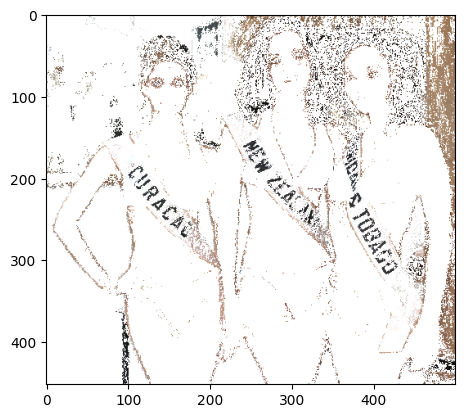

In [21]:

import matplotlib.pyplot as plt
plt.imshow(test_img)